In [32]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score


In [2]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
data.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


# Data Preprocessing

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
data.shape

(100000, 9)

In [9]:
data = data.reset_index().drop(columns = 'index')

In [10]:
data.head(2)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0


In [11]:
data = data.drop(columns='Name') ##can be recognized using customerID

In [12]:
data['Gender'].nunique()

2

In [13]:
data['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

CustomerID


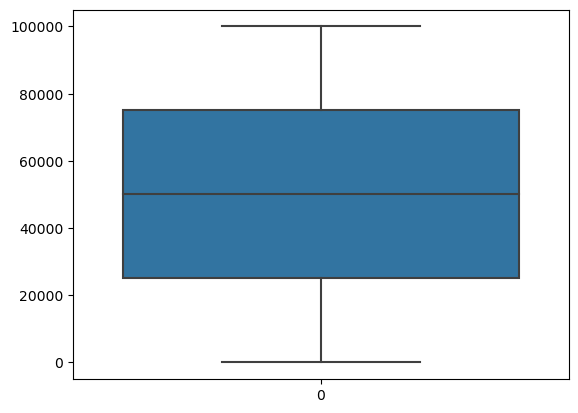

Age


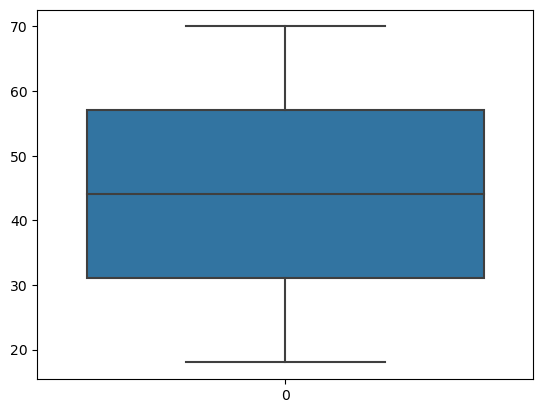

Subscription_Length_Months


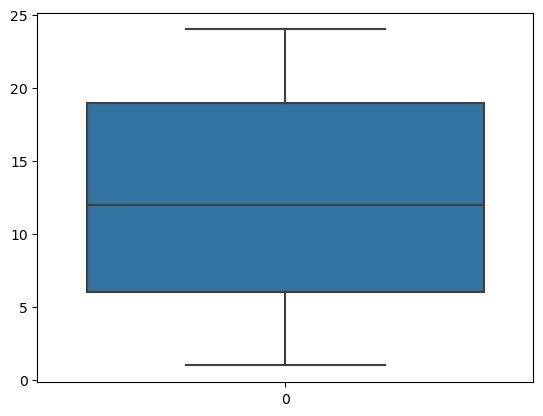

Monthly_Bill


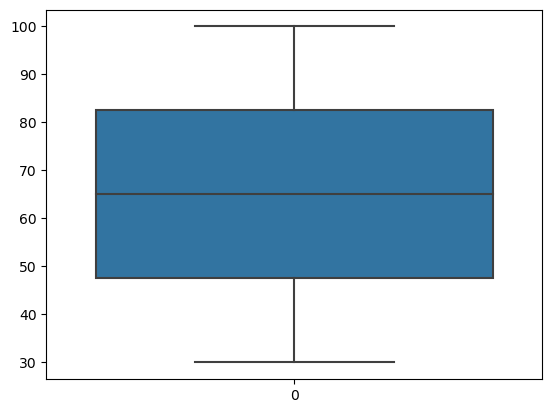

Total_Usage_GB


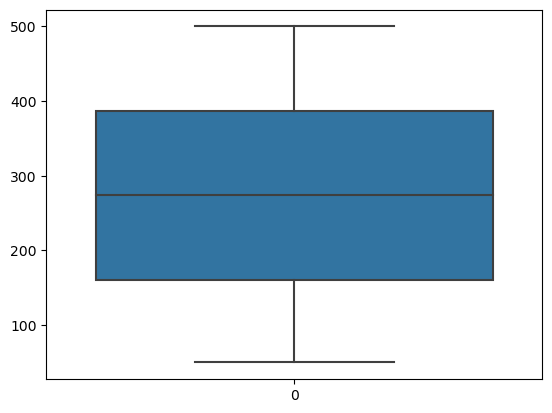

Churn


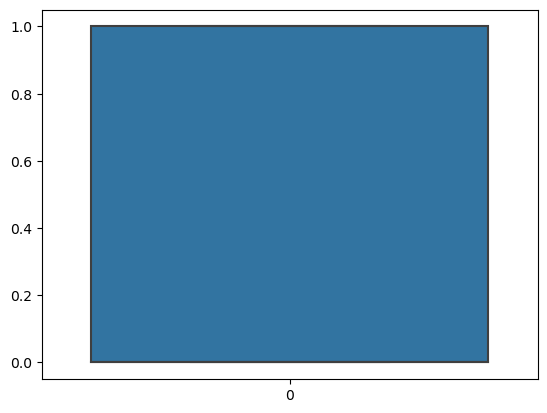

In [14]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.boxplot(data[col])
    plt.show()

## No outliers in the given data

# Feature Engineering

In [15]:
data['Age'].unique()

array([63, 62, 24, 36, 46, 67, 30, 20, 53, 50, 44, 34, 28, 42, 55, 43, 31,
       41, 58, 64, 70, 18, 25, 27, 66, 29, 60, 26, 45, 19, 37, 49, 38, 57,
       47, 48, 40, 21, 33, 51, 35, 69, 61, 52, 39, 56, 59, 65, 22, 54, 68,
       32, 23], dtype=int64)

In [16]:
data['Age_range'] = pd.cut(data['Age'], bins=[0, 18, 25, 35, 50, 65, 100], labels=['0-18', '19-25', '26-35', '36-50', '51-65', '65+'])

<Axes: xlabel='Age_range', ylabel='count'>

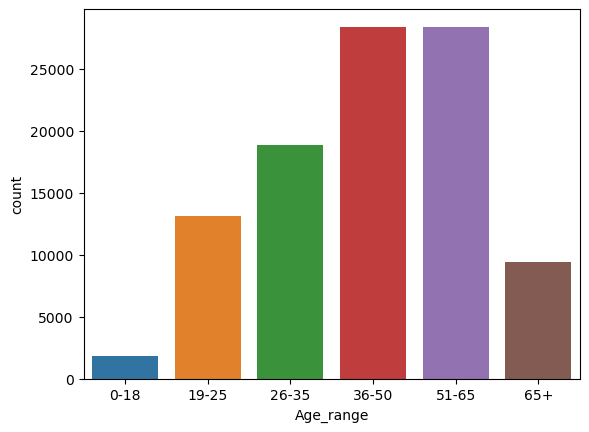

In [17]:
sns.countplot(x= 'Age_range', data = data)

<Axes: ylabel='Location'>

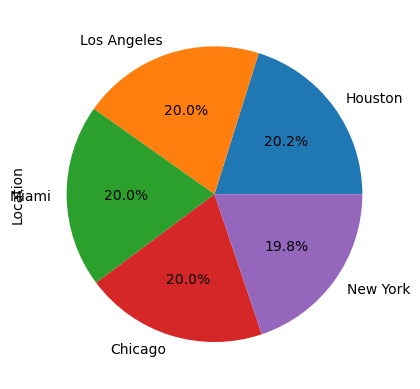

In [18]:
data['Location'].value_counts().plot.pie(autopct='%1.1f%%')

In [19]:
data['Total Bill'] = data['Subscription_Length_Months'] * data['Monthly_Bill']

In [20]:
data['Total_Usage_GB_range'] = pd.cut(data['Total_Usage_GB'], bins=[51, 150, 250, 350, 450, 550], labels=['51-150', '151-250', '251-350', '351-450', '451-550'])

<Axes: xlabel='Total_Usage_GB_range', ylabel='count'>

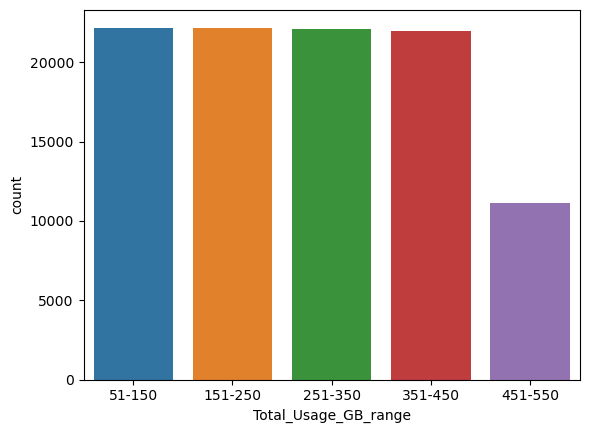

In [21]:
sns.countplot(x= 'Total_Usage_GB_range', data = data)

<Axes: xlabel='Gender', ylabel='Subscription_Length_Months'>

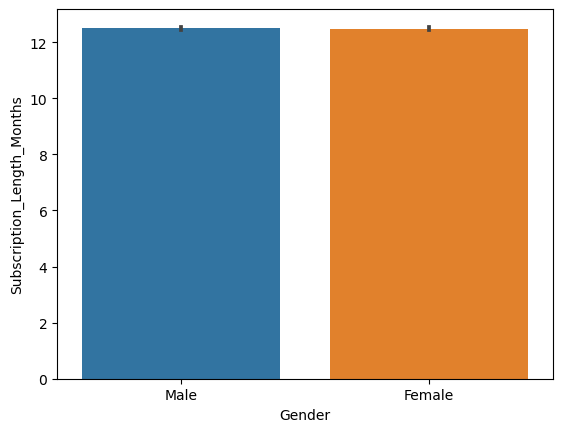

In [26]:
sns.barplot(x=data['Gender'], y=data['Subscription_Length_Months'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   CustomerID                  100000 non-null  int64   
 1   Age                         100000 non-null  int64   
 2   Gender                      100000 non-null  object  
 3   Location                    100000 non-null  object  
 4   Subscription_Length_Months  100000 non-null  int64   
 5   Monthly_Bill                100000 non-null  float64 
 6   Total_Usage_GB              100000 non-null  int64   
 7   Churn                       100000 non-null  int64   
 8   Age_range                   100000 non-null  category
 9   Total Bill                  100000 non-null  float64 
 10  Total_Usage_GB_range        99536 non-null   category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 7.1+ MB


In [28]:
# Categorical & Numerical Column names seperation:
# ------------------------------------------------

cat_cols = data.select_dtypes('object').columns
print(cat_cols)

num_cols = data.drop(columns='Churn').select_dtypes(['int','float']).columns
print(num_cols)

Index(['Gender', 'Location'], dtype='object')
Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Total Bill'],
      dtype='object')


In [33]:
categorical_preprocessing = Pipeline([
        ('Categorical Imputer',SimpleImputer(strategy='most_frequent')),
        ('Encoding',OneHotEncoder(sparse = False,handle_unknown='ignore'))
    ])

numerical_preprocessing = Pipeline([
        ('Numerical Imputer',SimpleImputer(strategy='mean')),
        ('Scaling',MinMaxScaler())
    ])

In [34]:
Final_preprocessing = ColumnTransformer(
transformers = 
    [
    ('categorical preprocessing',categorical_preprocessing,cat_cols),
    ('numerical preprocessing',numerical_preprocessing,num_cols)      
])

In [35]:
Package = Pipeline([
   ('Preprocessing',Final_preprocessing),
   ('model',LogisticRegression())
])

In [37]:
# Model saving/Loading Library
import joblib
joblib.dump(Package,'LogisticRegression.pkl')

['LogisticRegression.pkl']

In [38]:
x= data.drop(columns = 'Churn')

In [39]:
y = data['Churn']

In [40]:
Package.fit(x,y)

C:\Users\yamin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('categorical preprocessing',
                                                  Pipeline(steps=[('Categorical '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Location'], dtype='object')),
                                                 ('numerical preprocessing',
                                                  Pipeline(steps=[('Numerical '
                                                                   'Imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Total Bill'],
      dtype='object'))])),
                ('model', LogisticRegression())])

## EDA
1. Only 0.2% more are Female users
2. Age range between 36-50 and 51-65 are more subscribers and 0-18 are less.
3. Houston has more subscribers and NewYork has the least.

<Axes: ylabel='Gender'>

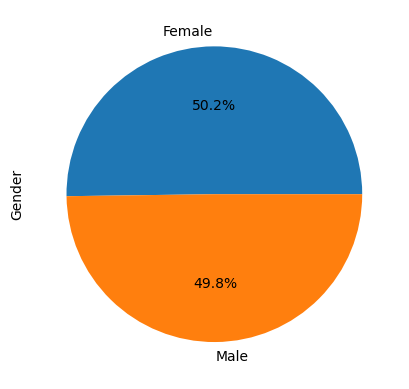

In [44]:
data['Gender'].value_counts().plot.pie(autopct = '%1.1f%%')

In [45]:
data['Age'].unique()

array([63, 62, 24, 36, 46, 67, 30, 20, 53, 50, 44, 34, 28, 42, 55, 43, 31,
       41, 58, 64, 70, 18, 25, 27, 66, 29, 60, 26, 45, 19, 37, 49, 38, 57,
       47, 48, 40, 21, 33, 51, 35, 69, 61, 52, 39, 56, 59, 65, 22, 54, 68,
       32, 23], dtype=int64)

In [49]:
data['Age_range'] = pd.cut(data['Age'], bins=[0, 18, 25, 35, 50, 65, 100], labels=['0-18', '19-25', '26-35', '36-50', '51-65', '65+'])

In [50]:
data.head(5)

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,age_range,Age_range
0,1,63,Male,Los Angeles,17,73.36,236,0,51-65,51-65
1,2,62,Female,New York,1,48.76,172,0,51-65,51-65
2,3,24,Female,Los Angeles,5,85.47,460,0,19-25,19-25
3,4,36,Female,Miami,3,97.94,297,1,36-50,36-50
4,5,46,Female,Miami,19,58.14,266,0,36-50,36-50


In [54]:
data = data.drop(columns = ['Age','age_range'])

<Axes: xlabel='Age_range', ylabel='count'>

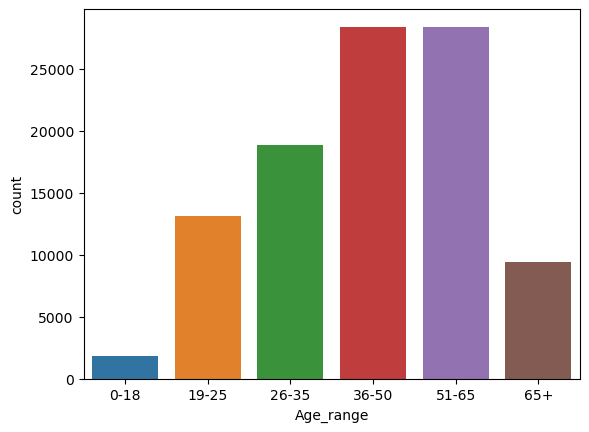

In [55]:
sns.countplot(x= 'Age_range', data = data)

<Axes: ylabel='Location'>

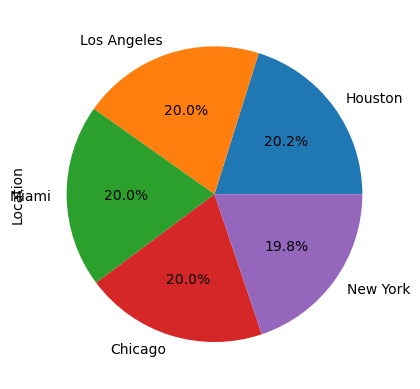

In [56]:
data['Location'].value_counts().plot.pie(autopct='%1.1f%%')

## EDA- BIvariate
As Subcriber months increase more is total bill

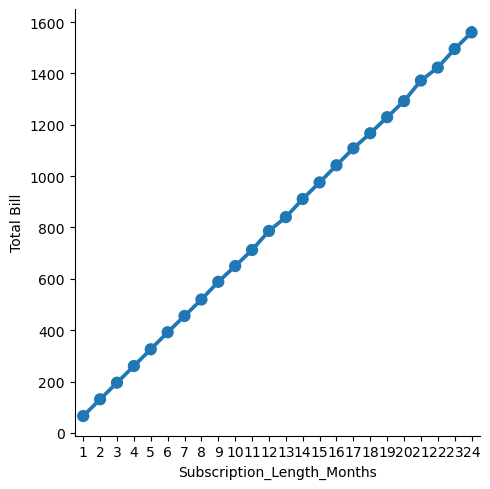

In [65]:
sns.catplot(x='Subscription_Length_Months', y='Total Bill', data = data, kind='point' )

In [60]:
data['Subscription_Length_Months'].unique()

array([17,  1,  5,  3, 19, 15, 10, 12, 20, 13,  8, 23,  2,  4, 18,  9, 14,
       16,  6,  7, 24, 22, 11, 21], dtype=int64)

In [61]:
data['Total Bill'] = data['Subscription_Length_Months'] * data['Monthly_Bill']

In [63]:
data

,CustomerID,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_range,Total Bill
0,1,Male,Los Angeles,17,73.36,236,0,51-65,1247.12
1,2,Female,New York,1,48.76,172,0,51-65,48.76
2,3,Female,Los Angeles,5,85.47,460,0,19-25,427.35
3,4,Female,Miami,3,97.94,297,1,36-50,293.82
4,5,Female,Miami,19,58.14,266,0,36-50,1104.66
...,...,...,...,...,...,...,...,...,...
99995,99996,Male,Houston,23,55.13,226,1,26-35,1267.99
99996,99997,Female,New York,19,61.65,351,0,51-65,1171.35
99997,99998,Male,Chicago,17,96.11,251,1,51-65,1633.87
99998,99999,Female,New York,20,49.25,434,1,51-65,985.00


In [66]:
data['Total_Usage_GB'].unique()

array([236, 172, 460, 297, 266, 456, 269, 396, 150, 383, 442, 295, 148,
       239, 233, 231, 198, 354, 429, 243, 270, 389, 226, 393,  89, 183,
       135, 185, 151, 115, 194, 278, 423, 202, 495, 162, 101, 294, 122,
       305, 212, 220, 253, 411, 447, 218, 221, 166,  64,  67, 391, 232,
       298, 334, 326, 459, 371, 299, 376, 214, 329,  50, 444, 113,  76,
       134, 184, 319, 235,  85, 332,  73, 369, 308, 446, 321,  83, 114,
       296, 102, 215, 169, 225, 140,  84, 463, 402, 468, 375, 366, 404,
       471, 204, 320, 178, 149, 361, 304, 281, 177, 117, 137, 322, 427,
       403, 237, 439, 336, 344, 288, 257, 196, 365, 419, 111, 192, 244,
       287, 395, 213, 109, 286, 283, 230, 491, 274, 335, 462, 407, 126,
       199, 351, 261, 496, 480, 400, 303, 197, 181, 474, 348, 112, 457,
        54, 397, 100, 318, 242, 327, 476, 256, 241, 466, 438,  51, 165,
       120, 493,  59, 188, 339, 167, 301, 209, 311, 190, 345, 284, 390,
        72, 258, 358, 136, 280,  55, 309, 388,  52, 478, 401, 47

In [69]:
data['Total_Usage_GB_range'] = pd.cut(data['Total_Usage_GB'], bins=[51, 150, 250, 350, 450, 550], labels=['51-150', '151-250', '251-350', '351-450', '451-550'])

<Axes: xlabel='Total_Usage_GB_range', ylabel='count'>

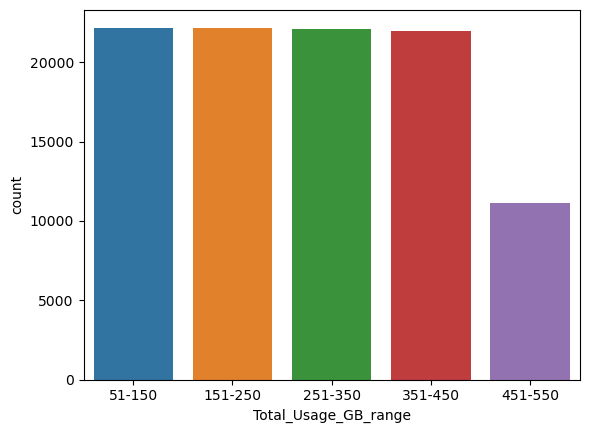

In [70]:
sns.countplot(x= 'Total_Usage_GB_range', data = data)

In [26]:
data_cat = data.select_dtypes(exclude = np.number)

In [27]:
data_cat.columns

Index(['Gender', 'Location'], dtype='object')

In [28]:
data_cat = pd.get_dummies(data_cat)

In [29]:
data_cat = data_cat.reset_index().drop(columns = 'index')

In [30]:
data_num = data.select_dtypes(include = np.number)

In [31]:
data_num = data_num.reset_index().drop(columns = 'index')

In [38]:
data_num.columns

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')

In [34]:
data_preprocessed = pd.concat([data_num,data_cat],axis = 1)

In [35]:
data_preprocessed.head(5)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,63,17,73.36,236,0,0,1,0,0,1,0,0
1,2,62,1,48.76,172,0,1,0,0,0,0,0,1
2,3,24,5,85.47,460,0,1,0,0,0,1,0,0
3,4,36,3,97.94,297,1,1,0,0,0,0,1,0
4,5,46,19,58.14,266,0,1,0,0,0,0,1,0


## Splitting train and test